In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
google = pd.read_csv("data/google.csv", parse_dates=["Date"], index_col="Date")

In [3]:
google.head()

,Close
Date,
2014-01-02,556.00
2014-01-03,551.95
2014-01-04,NaN
2014-01-05,NaN
2014-01-06,558.10


In [4]:
google.tail()

,Close
Date,
2016-12-26,NaN
2016-12-27,791.55
2016-12-28,785.05
2016-12-29,782.79
2016-12-30,771.82


In [5]:
first_price = google.Close.iloc[0]

In [6]:
first_price

556.0

In [7]:
#Normalizing a single series
normalized = google.Close.div(first_price).mul(100)

<AxesSubplot:title={'center':'Google Normalized Series'}, xlabel='Date'>

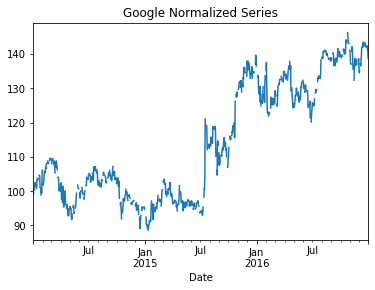

In [8]:
normalized.plot(title="Google Normalized Series")

In [9]:
normalized

Date
2014-01-02    100.000000
2014-01-03     99.271583
2014-01-04           NaN
2014-01-05           NaN
2014-01-06    100.377698
                 ...    
2016-12-26           NaN
2016-12-27    142.365108
2016-12-28    141.196043
2016-12-29    140.789568
2016-12-30    138.816547
Name: Close, Length: 1094, dtype: float64

In [10]:
prices = pd.read_csv("data/asset_classes.csv", index_col="DATE",parse_dates=["DATE"])

In [11]:
prices.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2469 entries, 2007-06-29 to 2017-06-26
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   SP500   2469 non-null   float64
 1   Bonds   2469 non-null   float64
 2   Gold    2469 non-null   float64
 3   Oil     2469 non-null   float64
dtypes: float64(4)
memory usage: 96.4 KB


In [12]:
prices.head()

,SP500,Bonds,Gold,Oil
DATE,,,,
2007-06-29,1503.35,402.15,648.50,70.47
2007-07-02,1519.43,402.96,650.50,71.11
2007-07-03,1524.87,402.02,657.25,71.41
2007-07-05,1525.40,400.15,655.90,71.81
2007-07-06,1530.44,399.31,647.75,72.80


In [13]:
first = prices.iloc[0]

In [14]:
normalized = prices.div(prices.iloc[0]).mul(100)
normalized

,SP500,Bonds,Gold,Oil
DATE,,,,
2007-06-29,100.000000,100.000000,100.000000,100.000000
2007-07-02,101.069611,100.201417,100.308404,100.908188
2007-07-03,101.431470,99.967674,101.349268,101.333901
2007-07-05,101.466724,99.502673,101.141095,101.901518
2007-07-06,101.801976,99.293796,99.884348,103.306372
...,...,...,...,...
2017-06-20,162.106629,154.628870,192.212799,61.501348
2017-06-21,162.012173,154.902400,192.297610,60.280971
2017-06-22,161.938338,154.899913,192.968389,60.351923


array([<AxesSubplot:xlabel='DATE'>, <AxesSubplot:xlabel='DATE'>,
       <AxesSubplot:xlabel='DATE'>, <AxesSubplot:xlabel='DATE'>],
      dtype=object)

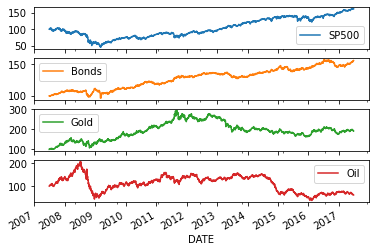

In [15]:
normalized.plot(subplots=True)

In [16]:
stocks = pd.read_csv("data/nyse.csv", parse_dates=["date"], index_col="date")
dow_jones = pd.read_csv("data/dow_jones.csv", parse_dates=["date"], index_col="date")


In [17]:
data=pd.concat([stocks, dow_jones], axis =1)

In [18]:
f_values = data.iloc[0]
f_values

JNJ        64.68
JPM        42.85
XOM        69.15
DJIA    10583.96
Name: 2010-01-04 00:00:00, dtype: float64

In [19]:
normalized_data=data.div(f_values).mul(100)

array([<AxesSubplot:xlabel='date'>, <AxesSubplot:xlabel='date'>,
       <AxesSubplot:xlabel='date'>, <AxesSubplot:xlabel='date'>],
      dtype=object)

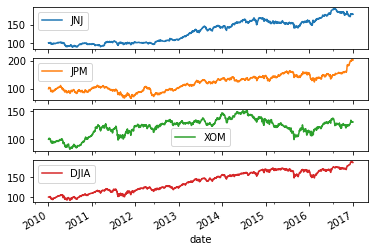

In [20]:
normalized_data.plot(subplots=True)

In [21]:
#Changing the time series frequency: resampling

In [27]:
dates = pd.date_range(start="2016", periods=4, freq='Q')
data = range(1,5)
quarterly = pd.Series(data=data, index=dates)


In [28]:
#Upsampling
monthly = quarterly.asfreq("M")
monthly=monthly.to_frame("baseline")
monthly

,baseline
2016-03-31,1.0
2016-04-30,NaN
2016-05-31,NaN
2016-06-30,2.0
2016-07-31,NaN
2016-08-31,NaN
2016-09-30,3.0
2016-10-31,NaN
2016-11-30,NaN
2016-12-31,4.0


In [29]:
#fill missing values

In [30]:
monthly["ffill"] = quarterly.asfreq("M", method="ffill")
monthly["bfill"] = quarterly.asfreq("M", method="bfill")
monthly["value"] = quarterly.asfreq("M", fill_value=0)

In [31]:
monthly

,baseline,ffill,bfill,value
2016-03-31,1.0,1,1,1
2016-04-30,NaN,1,2,0
2016-05-31,NaN,1,2,0
2016-06-30,2.0,2,2,2
2016-07-31,NaN,2,3,0
2016-08-31,NaN,2,3,0
2016-09-30,3.0,3,3,3
2016-10-31,NaN,3,4,0
2016-11-30,NaN,3,4,0
2016-12-31,4.0,4,4,4


In [33]:
# Set start and end dates
start = '2016-1-1'
end = '2016-2-29'

# Create monthly_dates here
monthly_dates =  pd.date_range(start=start, end=end, freq='M')

# Create and print monthly here
monthly = pd.Series([1,2], index=monthly_dates)
print(monthly)

# Create weekly_dates here
weekly_dates =  pd.date_range(start=start, end=end, freq='W')

# Print monthly, reindexed using weekly_dates
print(monthly.reindex(weekly_dates))
print(monthly.reindex(weekly_dates,method="bfill"))
print(monthly.reindex(weekly_dates,method="ffill"))


2016-01-31    1
2016-02-29    2
Freq: M, dtype: int64
2016-01-03    NaN
2016-01-10    NaN
2016-01-17    NaN
2016-01-24    NaN
2016-01-31    1.0
2016-02-07    NaN
2016-02-14    NaN
2016-02-21    NaN
2016-02-28    NaN
Freq: W-SUN, dtype: float64
2016-01-03    1
2016-01-10    1
2016-01-17    1
2016-01-24    1
2016-01-31    1
2016-02-07    2
2016-02-14    2
2016-02-21    2
2016-02-28    2
Freq: W-SUN, dtype: int64
2016-01-03    NaN
2016-01-10    NaN
2016-01-17    NaN
2016-01-24    NaN
2016-01-31    1.0
2016-02-07    1.0
2016-02-14    1.0
2016-02-21    1.0
2016-02-28    1.0
Freq: W-SUN, dtype: float64


In [ ]:
#Upsampling & interpolation with .resample()


In [42]:
unrate = pd.read_csv("data/unrate.csv", parse_dates=["DATE"], index_col="DATE")
unrate.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 85 entries, 2010-01-01 to 2017-01-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   UNRATE  85 non-null     float64
dtypes: float64(1)
memory usage: 1.3 KB


In [43]:
unrate.head()

,UNRATE
DATE,
2010-01-01,9.8
2010-02-01,9.8
2010-03-01,9.9
2010-04-01,9.9
2010-05-01,9.6


In [46]:
unrate.resample("MS")

In [48]:
unrate.asfreq("MS").equals(unrate.resample("MS").asfreq())

True

In [51]:
gdp = pd.read_csv("data/gdp_growth.csv",parse_dates=["date"],index_col="date")

In [55]:
gdp.head(10)

,gdp_growth
date,
2007-01-01,0.2
2007-04-01,3.1
2007-07-01,2.7
2007-10-01,1.4
2008-01-01,-2.7
2008-04-01,2.0
2008-07-01,-1.9
2008-10-01,-8.2
2009-01-01,-5.4


In [56]:
gdp.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 41 entries, 2007-01-01 to 2017-01-01
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   gdp_growth  41 non-null     float64
dtypes: float64(1)
memory usage: 656.0 bytes


In [59]:
gdp_1 = gdp.resample("MS").ffill().add_suffix("_ffill")
gdp_1

,gdp_growth_ffill
date,
2007-01-01,0.2
2007-02-01,0.2
2007-03-01,0.2
2007-04-01,3.1
2007-05-01,3.1
...,...
2016-09-01,3.5
2016-10-01,2.1
2016-11-01,2.1


In [60]:
gdp_2 = gdp.resample("MS").interpolate().add_suffix("_inter")
gdp_2

,gdp_growth_inter
date,
2007-01-01,0.200000
2007-02-01,1.166667
2007-03-01,2.133333
2007-04-01,3.100000
2007-05-01,2.966667
...,...
2016-09-01,2.566667
2016-10-01,2.100000
2016-11-01,1.866667
